**Απόστολος Μουστάκης**

**AM: 03400182**

<font color='darkred'>Οι απαντήσεις σε όλα τα ερωτήματα γράφονται με αυτό το χρώμα ώστε να ξεχωρίζουν από τις εκφωνήσεις </font>

<h1><b>Restricted Boltzmann Machine και Deep Belief Network</b></h1>
<p align="justify">Στην συγκεκριμένη άσκηση θα μελετήσετε τον τρόπο λειτουργίας μιας <i>RBM (<a href="https://en.wikipedia.org/wiki/Restricted_Boltzmann_machine">Restricted Boltzmann Machine</a>)</i> καθώς και των <i>DBN (<a href="https://en.wikipedia.org/wiki/Deep_belief_network">Deep Belief Network</a>)</i>, χρησιμοποιώντας το έτοιμο πρόγραμμα που σας δίνεται.Το συγκεκριμένο πρόγραμμα αξιοποιεί το <a href="https://en.wikipedia.org/wiki/MNIST_database">dataset του <i>MNIST</i></a>, όπου είναι μια μεγάλη βάση δεδομένων με χειρόγραφα ψηφία που χρησιμοποιείται συνήθως για την εκπαίδευση διαφόρων συστημάτων επεξεργασίας εικόνας. Για την άσκηση, θα πρέπει να χρησιμοποιήσετε το αρχείο <i>mnist_original.mat</i>, το οποίο είναι διαθέσιμο από <a href="https://www.kaggle.com/datasets/avnishnish/mnist-original?resource=download">εδώ</a>.</p>
<p align="justify">Μία αρκετά σημαντική εφαρμογή της <i>RBM</i> είναι η εξαγωγή χαρακτηριστικών (feature representation) από ένα dataset με σκοπό την αναπαράσταση της εισόδου (ορατοί νευρώνες) με ένα διάνυσμα μικρότερης διάστασης (κρυφοί νευρώνες). Στη συγκεκριμένη άσκηση θα συγκρίνετε την ακρίβεια ενός ταξινομητή ψηφίων με τη χρήση του αλγορίθμου <i>Logistic Regression</i>, όταν εκείνος δέχεται ως είσοδο το dataset (i) χωρίς να έχει υποστεί επεξεργασία από το <i>RBM</i>, (ii) αφου υποστεί επεξεργασία από το <i>RBM</i>, (iii) με τη χρήση <i>DBN</i>, δηλαδή δύο stacked <i>RBM</i>.</p>

In [11]:
#!/usr/bin/env python
# source: https://devdreamz.com/question/905929-stacking-rbms-to-create-deep-belief-network-in-sklearn

import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import BernoulliRBM
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

def norm(arr):
    arr = arr.astype(float)
    arr -= arr.min()
    arr /= arr.max()
    return arr

if __name__ == '__main__':

    # load MNIST data set
    mnist = loadmat("mnist-original.mat")
    X, Y = mnist["data"].T, mnist["label"][0]

    # normalize inputs to 0-1 range
    X = norm(X)

    # split into train, validation, and test data sets
    X_train, X_test, Y_train, Y_test = train_test_split(X,       Y,       test_size=10000, random_state=0)
    X_train, X_val,  Y_train, Y_val  = train_test_split(X_train, Y_train, test_size=10000, random_state=0)

    # --------------------------------------------------------------------------------
    # set hyperparameters

    learning_rate = 0.02 
    total_units   =  800 
    total_epochs  =   50
    batch_size    =  128

    C = 100. # optimum for benchmark model according to sklearn docs: https://scikit-learn.org/stable/auto_examples/neural_networks/plot_rbm_logistic_classification.html#sphx-glr-auto-examples-neural-networks-plot-rbm-logistic-classification-py)

    # --------------------------------------------------------------------------------
    # construct models

    # RBM
    rbm = BernoulliRBM(n_components=total_units, learning_rate=learning_rate, batch_size=batch_size, n_iter=total_epochs, verbose=1)

    # "output layer"
    logistic = LogisticRegression(C=C, solver='lbfgs', multi_class='multinomial', max_iter=200, verbose=1)

    models = []
    models.append(Pipeline(steps=[('logistic', clone(logistic))]))                                              # base model / benchmark
    models.append(Pipeline(steps=[('rbm1', clone(rbm)), ('logistic', clone(logistic))]))                        # single RBM
    models.append(Pipeline(steps=[('rbm1', clone(rbm)), ('rbm2', clone(rbm)), ('logistic', clone(logistic))]))  # RBM stack / DBN

    # --------------------------------------------------------------------------------
    # train and evaluate models

    for model in models:
        # train
        model.fit(X_train, Y_train)

        # evaluate using validation set
        print("Model performance:\n%s\n" % (
            classification_report(Y_val, model.predict(X_val))))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished


Model performance:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       995
         1.0       0.96      0.98      0.97      1121
         2.0       0.90      0.90      0.90      1015
         3.0       0.90      0.88      0.89      1033
         4.0       0.92      0.92      0.92       976
         5.0       0.90      0.88      0.89       884
         6.0       0.94      0.94      0.94       999
         7.0       0.92      0.93      0.92      1034
         8.0       0.88      0.86      0.87       923
         9.0       0.89      0.90      0.90      1020

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000


[BernoulliRBM] Iteration 1, pseudo-likelihood = -141.74, time = 18.60s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -118.34, time = 24.59s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -105.35, time = 24.60s
[Bernoul

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.2s finished


Model performance:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       995
         1.0       0.99      0.99      0.99      1121
         2.0       0.96      0.98      0.97      1015
         3.0       0.97      0.96      0.97      1033
         4.0       0.97      0.97      0.97       976
         5.0       0.97      0.97      0.97       884
         6.0       0.98      0.98      0.98       999
         7.0       0.98      0.97      0.98      1034
         8.0       0.96      0.97      0.96       923
         9.0       0.96      0.97      0.96      1020

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


[BernoulliRBM] Iteration 1, pseudo-likelihood = -141.84, time = 15.92s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -118.13, time = 22.77s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -103.58, time = 22.48s
[Bernoul

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished


Model performance:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       995
         1.0       0.99      0.99      0.99      1121
         2.0       0.97      0.98      0.98      1015
         3.0       0.97      0.97      0.97      1033
         4.0       0.98      0.97      0.97       976
         5.0       0.97      0.97      0.97       884
         6.0       0.99      0.97      0.98       999
         7.0       0.98      0.98      0.98      1034
         8.0       0.97      0.97      0.97       923
         9.0       0.95      0.96      0.95      1020

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000




<li>Να περιγράψετε σύντομα τον τρόπο λειτουργίας μιας <i>RBM</i>. Τι διαφορές έχει σε σχέση με μία <i> Μηχανή Boltzmann</i>;</li>

<font color='darkred'>H RBM (Restricted Boltzmann Machine) είναι ένα είδος νευρωνικού δικτύου που χρησιμοποιείται για μη επιβλεπόμενη μάθηση. Συγκεκριμένα είναι ένας τύπος παραγωγικού μοντέλου (generative model), όπου μαθαίνει μία κατανομή πιθανοτήτων σε ένα σύνολο δεδομένων εισόδου. Η RBM αποτελείται από δύο στρώματα νευρώνων, το ορατό στρώμα (visible layer) και το κρυφό στρώμα (hidden layer). To ορατό στρώμα αντιπροσωπεύει τα δεδομένα εισόδου, ενώ το κρυφό στρώμα αντιπροσωπεύει ένα σύνολο χαρακτηριστικών που μαθαίνονται από το δίκτυο.

<font color='darkred'>Η κύρια διαφορά με μία BM είναι ότι σε μία RBM δεν επιτρέπονται οι συνδέσεις μεταξύ των νευρώνων στο ίδιο στρώμα. Με άλλα λόγια, κάθε νευρώνας στο ορατό στρώμα συνδέεται μόνο με νευρώνες στο κρυφό στρώμα και το αντίστροφο. Παρακάτω βλέπουμε μία εικόνα όπου αριστερά αποτυπώνεται μία BM (όλοι οι νευρώνες συνδέονται μεταξύ τους) και δεξιά μία RBM (οι νευρώνες του φανερού στρώματος συνδέονται με όλους τους νευρώνες του κρυφού στρώματος και αντίστροφα αλλά ποτέ με νευρώνες του ίδιου στρώματος).


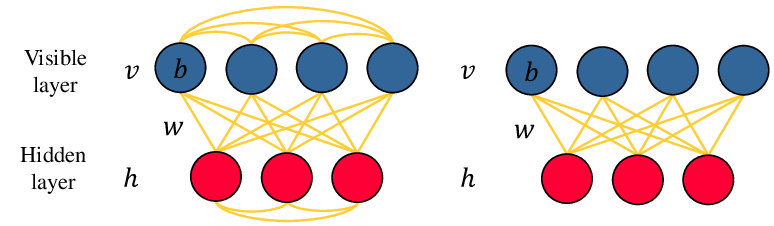

In [6]:
from IPython.display import Image
Image('RBM vs BM.png',width=350, height=120)

<font color='darkred'>

<li>Ποια είναι η λογική των <i>DBN</i> και σε τι προβλήματα τα αξιοποιούμε;</li>

<font color='darkred'>Τα Deep Belief Networks (DBN) είναι ένας τύπος νευρωνικού δικτύου που αποτελείται από πολλαπλά στρώματα διασυνδεδεμένων νευρώνων. Κατά κύρια βάση τα στρώματα αυτά είναι RBMs, όπου το κρυφό επίπεδο της προηγούμενης RBM είναι το φανερό επίπεδο της επόμενης. 

<font color='darkred'>Η λογική πίσω από την χρήση DBN αφορά ότι τα πιο χαμηλά στρώματα μαθαίνουν απλά χαρακτηριστικά, ενώ τα υψηλότερα στρώματα μαθαίνουν πιο πολύπλοκα χαρακτηριστικά. Με αυτό τον τρόπο είναι πιο αποδοτικά στην επίλυση προβλημάτων, καθώς με την χρήση πολλών στρωμάτων γίνονται πιο ακριβή και μπορούν να αποτυπώσουν πιο σύνθετες αναπαραστάσεις και πολυπλοκότερες δομές.

<font color='darkred'>Μπορούμε να αξιοποιήσουμε DBN σε πληθώρα προβλημάτων που αξιοποιούνται και οι RBMs, τα οποία αναφέρονται στο επόμενο ερώτημα. 


<li>Να αναφέρετε τις βασικότερες εφαρμογές των <i>RBM</i> και <i>DBN</i>.</li>

<font color='darkred'>Υπάρχουν πολλές εφαρμογές στις οποίες αξιοποιούνται RBM και DBN. Ενδεικτικά έχουμε:
*   Αναγνώριση Προτύπων 
* Εξαγωγή Χαρακτηριστικών
*   Ταξινόμηση 
*   Μείωση Διαστατικότητας
*   Ανίχνευση Ανωμαλιών (outliers)
*   Recomendation Systems (Συστήματα σύστασης), όπου με βάση τις προηγούμενες προτιμήσεις και την συμπεριφορά του χρήστη γίνονται προτάσεις
*  Collaborative Filtering, όπου με βάση τις προτιμήσεις πολλών χρηστών γίνονται προβλέψεις για τις προτιμήσεις ενός χρήστη
*   Επεξεργασία Φυσικής Γλώσσας - NLP (πχ. στην μοντελοποίηση γλώσσας) 
* Βιοπληροφορική (πχ. πρόβλεψη δομής των πρωτεϊνών, ανάλυση γονιδιακής έκφρασης και ανακάλυψη φαρμάκων)
* Financial Modeling (πχ. πρόβλεψη τιμών μετοχών, ανάλυση κινδύνου και βελτιστοποίηση χαρτοφυλακίου)</font>







<li>Εκτός από <i>RBM</i>, τι άλλα μοντέλα μπορούν να χρησιμοποιηθούν για να δημιουργήσουν <i>DBN</i>.</li>

<font color='darkred'>Όπως ήδη αναφέραμε ένα DBN χρησιμοποιεί μία βαθιά αρχιτεκτονική, η οποία αποτελείται από πολλές RBMs στην σειρά (τουλάχιστον 2). Εκτός από RBMs υπάρχουν πολλά μοντέλα που θα μπορούσαν να χρησιμοποιηθούν για την κατασκευή ενός DBN. Ενδεικτικά: 

* Convolutional Neural Networks (CNNs) ως ορατό στρώμα για την εξαγωγή χαρακτηριστικών από εικόνες
* Recurrent Neural Networks (RNNs) ως κρυφό στρώμα για την αναπαράσταση περιεχομένων ακολουθιών (πχ. για ομιλία/κείμενο)
* Recurrent Convolutional Neural Networks (RCNNs) που αποτελεί συνδυασμός των προηγούμενων δύο και μπορεί να χρησιμοποιηθεί είτε ως ορατό είτε ως κρυφό στρώμα
* Autoencoders ως ορατό ή κρυφό στρώμα για την αποτελεσματική εκμάθηση των δεδομένων εισόδου. </font>


<li>Συγκρίνετε τα αποτελέσματα της ταξινόμησης με τον αλγόριθμo <i>Logistic Regression</i> χωρίς τη χρήση <i>RBM</i> σε σχέση με τα αποτελέσματα της ταξινόμησης που έχει χρησιμοποιηθεί η <i>RBM</i> καθώς και με αυτή όπου χρησιμοποιούνται <i>RBM</i> και <i>DBN</i> για την εξαγωγή των χαρακτηριστικών. Τι παρατηρείτε ως προς την ακρίβεια των αποτελεσμάτων;</li>
</ul>

<font color='darkred'> Με βάση τον κώδικα εκπαιδεύονται 3 διαφορετικά μοντέλα και κατόπιν τυπώνεται το classification report σε κάθε περίπτωση. Το πρώτο μοντέλο χρησιμοποιεί την Λογιστική Παλινδρόμηση ως ταξινομητή χωρίς χρήση RBM, το δεύτερο μοντέλο χρησιμοποιεί Λογιστική Παλινδρόμηση και RBM ενώ το τρίτο χρησιμοποιεί Λογιστική Παλινδρόμηση και DBN που αποτελείται από 2 RBMs. Η ακρίβεια σε κάθε περίπτωση, η οποία αντλείται από το classification report, φαίνεται στο παρακάτω πίνακα: <center>


|  Μοντέλο | Ακρίβεια   |
| :----:       |    :----:   | 
| Λογιστική Παλιδρόμηση χωρίς RBM |92%|
| RBM και Λογιστική Παλιδρόμηση |97%|
| DBN (2 RBMs) και Λογιστική Παλιδρόμηση |97%|


</center>

<font color='darkred'>Με μία πρώτη ματιά παρατηρούμε πως η ακρίβεια είναι πολύ υψηλή και στα 3 μοντέλα. Αρχικά, ακόμη και στην απλή περίπτωση όπου χρησιμοποιείται μόνο η Λογιστική Παλινδρόμηση ως ταξινομητής η ακρίβεια είναι πολύ υψηλή (92%). Αυτό μπορεί να οφείλεται σε διάφορα γεγονότα, όπως το ότι το dataset είναι πολύ μεγάλο και το ότι εκπαιδεύουμε τα δεδομένα για πολλές εποχές. Ωστόσο με την χρήση 1 RBM ως είσοδο της Λογιστικής Παλινδρόμησης η ακρίβεια αυξάνεται ακόμα περισσότερο και φτάνει στο 97%. Με 2 stacked RBMs η ακρίβεια παραμένει στο 97%. Γενικότερα περιμέναμε με την χρήση παραπάνω RBMs η ακρίβεια να αυξάνεται, αλλά όπως βλέπουμε στην συγκεκριμένη περίπτωση είναι πολύ υψηλή ήδη. Είναι φανερό πως η χρήση έστω 1 RBM αυξάνει την ακρίβεια σε πολύ υψηλά επίπεδα, αλλά παράλληλα αυξάνεται και αρκετά ο χρόνος εκπαίδευσης. Με 2 RBMs ο χρόνος εκπαίδευσης είναι πολύ υψηλός.